# Test fitting time of MLE fitting

In [1]:
%load_ext autoreload
%autoreload 2
%matplotlib inline
import unittest
import numpy as np
import multiprocessing as mp
from tqdm import tqdm
import matplotlib.pyplot as plt
import time

from aind_dynamic_foraging_models.generative_model.agent_q_learning import forager_Hattori2019
from aind_behavior_gym.dynamic_foraging.task.coupled_block_task import CoupledBlockTask
from aind_dynamic_foraging_basic_analysis import plot_foraging_session

#### Set up agent and generate simulated data

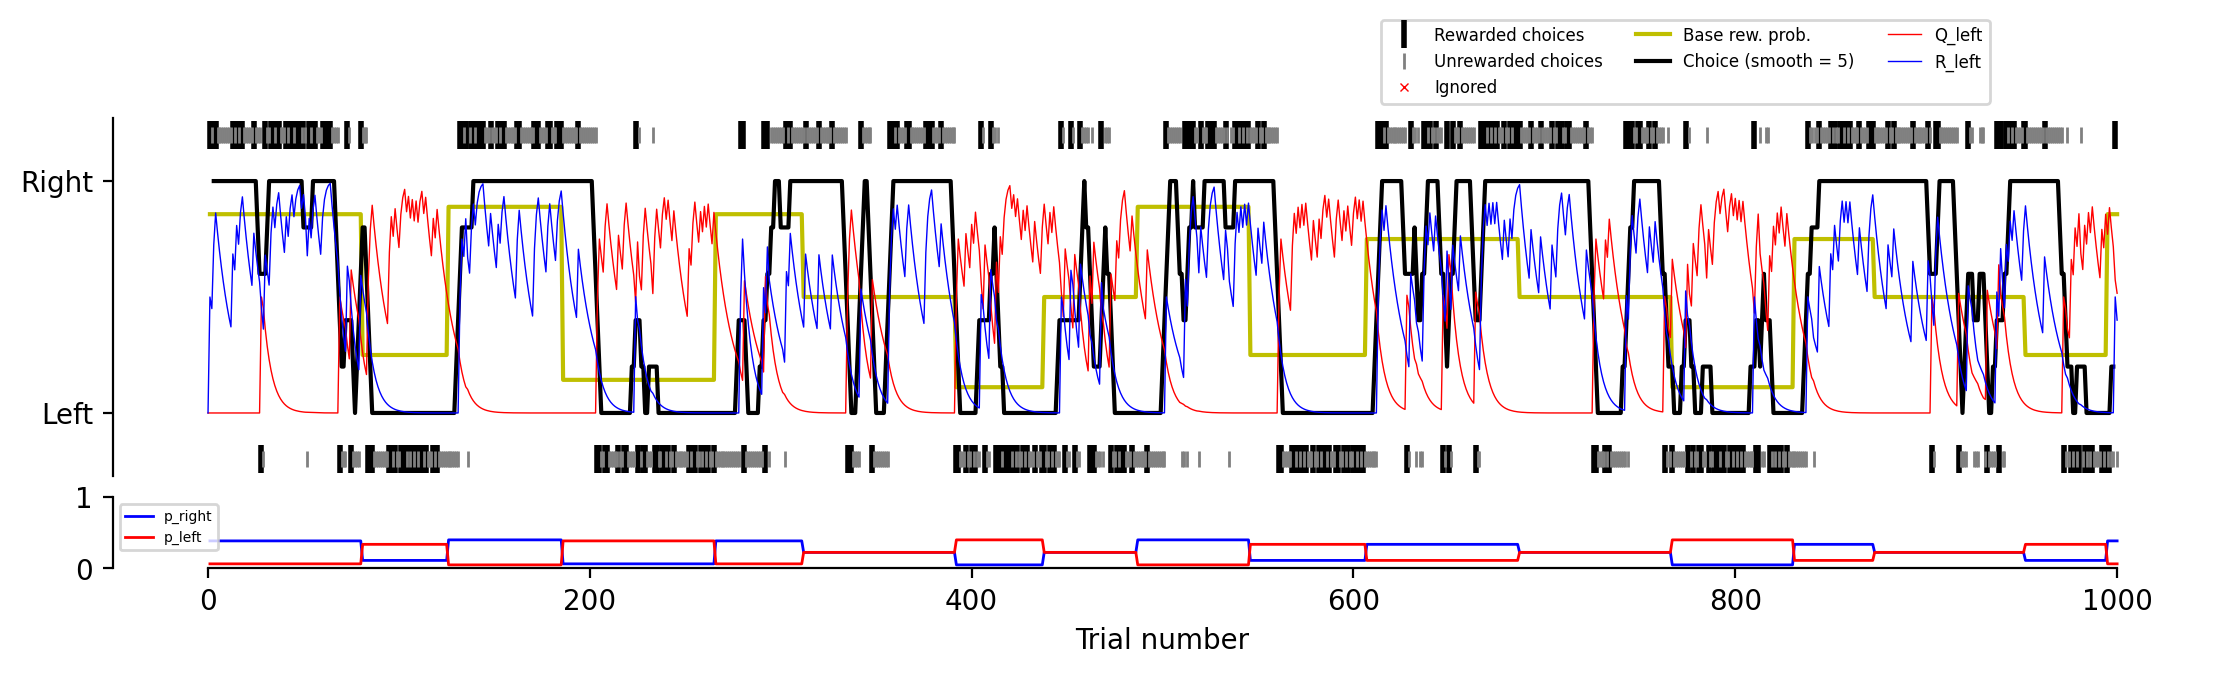

In [2]:
forager = forager_Hattori2019(
    dict(
        softmax_inverse_temperature=5,
        biasL=0,
    ),
    seed=42,
)
task = CoupledBlockTask(
    reward_baiting=True, 
    num_trials=1000, 
    seed=42
    )

forager.perform(task)
choice_history = forager.get_choice_history()
reward_history = forager.get_reward_history()
ground_truth_params = forager.params.model_dump()
ground_truth_choice_prob = forager.choice_prob
ground_truth_q_value = forager.q_value

fig, axes = forager.plot_session(if_plot_latent=True)


#### Model fitting

In [3]:
def time_fitting(DE_workers):
    start_time = time.time()
    forager = forager_Hattori2019()  # To fit a model, just create a new forager
    forager.fit(
        choice_history,
        reward_history,
        fit_bounds_override={"softmax_inverse_temperature": [0, 100]},
        clamp_params={"biasL": 0},
        DE_kwargs=dict(workers=DE_workers),
    )
    end_time = time.time()
    
    fitting_result = forager.fitting_result
    assert fitting_result.success
    np.testing.assert_array_almost_equal(
        fitting_result.x, [0.6010, 0.1087, 0.1544, 4.8908], decimal=2
    )
    
    fit_time = end_time - start_time
    print(f'Fitting time, DE_workers = {DE_workers}: {fit_time} s')
    return fit_time, forager

Warning: this cell takes a long time to run!

In [4]:
num_cpu_to_test = [1, 2, 4, 8, 16]
runs = 10
times = np.full((len(num_cpu_to_test), runs), np.nan)

for n, num_cpu in enumerate(tqdm(num_cpu_to_test)):
    for i, run in enumerate(tqdm(range(runs))):
        times[n, i], forager = time_fitting(num_cpu)

  0%|          | 0/5 [00:00<?, ?it/s]2024-08-21 04:26:22,386 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


2024-08-21 04:28:27,233 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 1: 124.84548950195312 s


2024-08-21 04:30:06,063 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 1: 98.82783055305481 s


2024-08-21 04:31:44,721 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 1: 98.65644192695618 s


2024-08-21 04:33:51,597 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 1: 126.87343144416809 s


2024-08-21 04:35:09,776 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 1: 78.17791676521301 s


2024-08-21 04:37:06,896 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 1: 117.11786794662476 s


2024-08-21 04:38:40,904 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 1: 94.00540733337402 s


2024-08-21 04:40:45,818 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 1: 124.91243362426758 s


2024-08-21 04:42:15,017 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 1: 89.19692516326904 s


 20%|██        | 1/5 [18:05<1:12:20, 1085.03s/it]

Fitting time, DE_workers = 1: 132.38973665237427 s


2024-08-21 04:44:27,413 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...
2024-08-21 04:45:23,029 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 2: 55.61396527290344 s


2024-08-21 04:46:55,590 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 2: 92.55842757225037 s


2024-08-21 04:47:49,599 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 2: 54.0059916973114 s


2024-08-21 04:48:53,687 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 2: 64.08592295646667 s


2024-08-21 04:49:46,236 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 2: 52.546125173568726 s


2024-08-21 04:50:45,417 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 2: 59.17889213562012 s


2024-08-21 04:51:41,504 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 2: 56.08425807952881 s


2024-08-21 04:52:36,297 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 2: 54.79062032699585 s


2024-08-21 04:53:22,632 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 2: 46.33283972740173 s


 40%|████      | 2/5 [28:00<39:51, 797.31s/it]   

Fitting time, DE_workers = 2: 60.690576791763306 s


2024-08-21 04:54:23,329 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...
2024-08-21 04:54:58,108 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 4: 34.77711749076843 s


2024-08-21 04:55:26,275 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 4: 28.164498329162598 s


2024-08-21 04:55:53,411 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 4: 27.133200883865356 s


2024-08-21 04:56:33,334 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 4: 39.92034864425659 s


2024-08-21 04:57:09,014 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 4: 35.67756748199463 s


2024-08-21 04:57:44,366 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 4: 35.34967041015625 s


2024-08-21 04:58:21,784 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 4: 37.416152000427246 s


2024-08-21 04:58:53,705 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 4: 31.917583227157593 s


2024-08-21 04:59:29,489 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 4: 35.7820258140564 s


 60%|██████    | 3/5 [33:40<19:36, 588.49s/it]

Fitting time, DE_workers = 4: 33.825376749038696 s


2024-08-21 05:00:03,321 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...
2024-08-21 05:00:29,188 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 8: 25.865148544311523 s


2024-08-21 05:00:59,072 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 8: 29.88136053085327 s


2024-08-21 05:01:22,067 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 8: 22.992632389068604 s


2024-08-21 05:01:39,615 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 8: 17.545913219451904 s


2024-08-21 05:02:07,439 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 8: 27.821386337280273 s


2024-08-21 05:02:30,713 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 8: 23.271920919418335 s


2024-08-21 05:02:52,223 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 8: 21.507577419281006 s


2024-08-21 05:03:13,144 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 8: 20.918397426605225 s


2024-08-21 05:03:36,275 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 8: 23.12894606590271 s


 80%|████████  | 4/5 [37:37<07:29, 449.50s/it]

Fitting time, DE_workers = 8: 23.47446370124817 s


2024-08-21 05:03:59,755 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...
2024-08-21 05:04:20,316 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 16: 20.55850124359131 s


2024-08-21 05:04:39,478 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 16: 19.15955877304077 s


2024-08-21 05:04:58,610 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 16: 19.129744291305542 s


2024-08-21 05:05:20,322 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 16: 21.709467887878418 s


2024-08-21 05:05:41,670 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 16: 21.34525752067566 s


2024-08-21 05:06:01,535 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 16: 19.862788677215576 s


2024-08-21 05:06:19,497 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 16: 17.959744215011597 s


2024-08-21 05:06:38,198 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 16: 18.698702573776245 s


2024-08-21 05:06:59,674 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 16: 21.473638772964478 s


100%|██████████| 5/5 [40:54<00:00, 490.98s/it]

Fitting time, DE_workers = 16: 17.580720901489258 s


Fitting time versus `DE_workers`.

Tested in CO machine "Flex (Default), 16 cores / 128 GB"

[Text(0.5, 0, 'Number of CPU workers'), Text(0, 0.5, 'Speed up (actual)')]

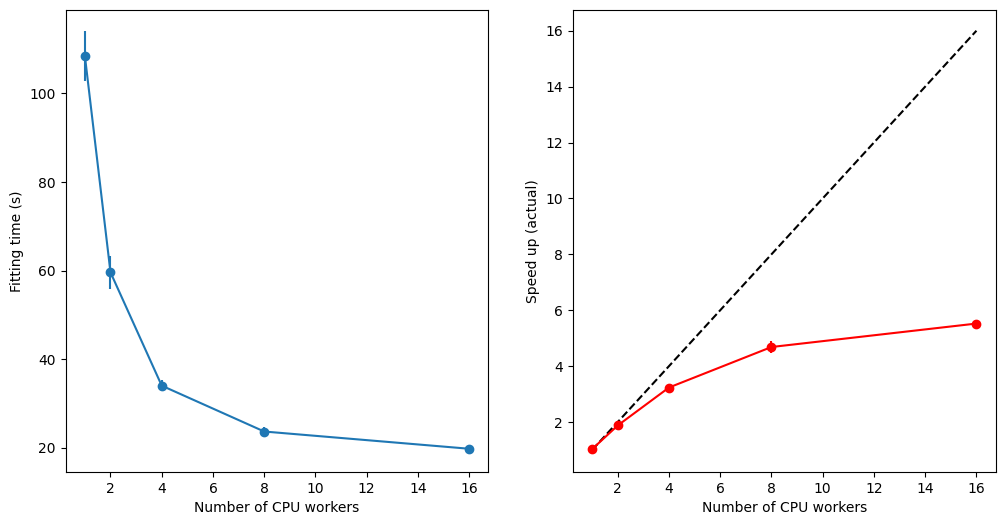

In [5]:
# Plot fitting times
time_mean = np.mean(times, axis=1)
time_sem = np.std(times, axis=1) / np.sqrt(runs)

_, axes = plt.subplots(1, 2, figsize=(12, 6))
axes[0].errorbar(num_cpu_to_test, time_mean, yerr=time_sem, fmt='o-')
axes[0].set(xlabel='Number of CPU workers', ylabel='Fitting time (s)')

# Speedup / num_cpu
parallel_efficiency = (time_mean[0] / times)
eff_mean = np.mean(parallel_efficiency, axis=1)
eff_sem = np.std(parallel_efficiency, axis=1) / np.sqrt(runs)
axes[1].errorbar(num_cpu_to_test, eff_mean, eff_sem, fmt='ro-')
axes[1].plot([1, num_cpu_to_test[-1]], [1, num_cpu_to_test[-1]], 'k--')
axes[1].set(xlabel='Number of CPU workers', ylabel='Speed up (actual)')

Plot fitted latent variables

2024-08-21 05:07:17,589 - aind_dynamic_foraging_models.generative_model.agent_q_learning - INFO - Fitting the model using the whole dataset...


Fitting time, DE_workers = 16: 22.877131938934326 s


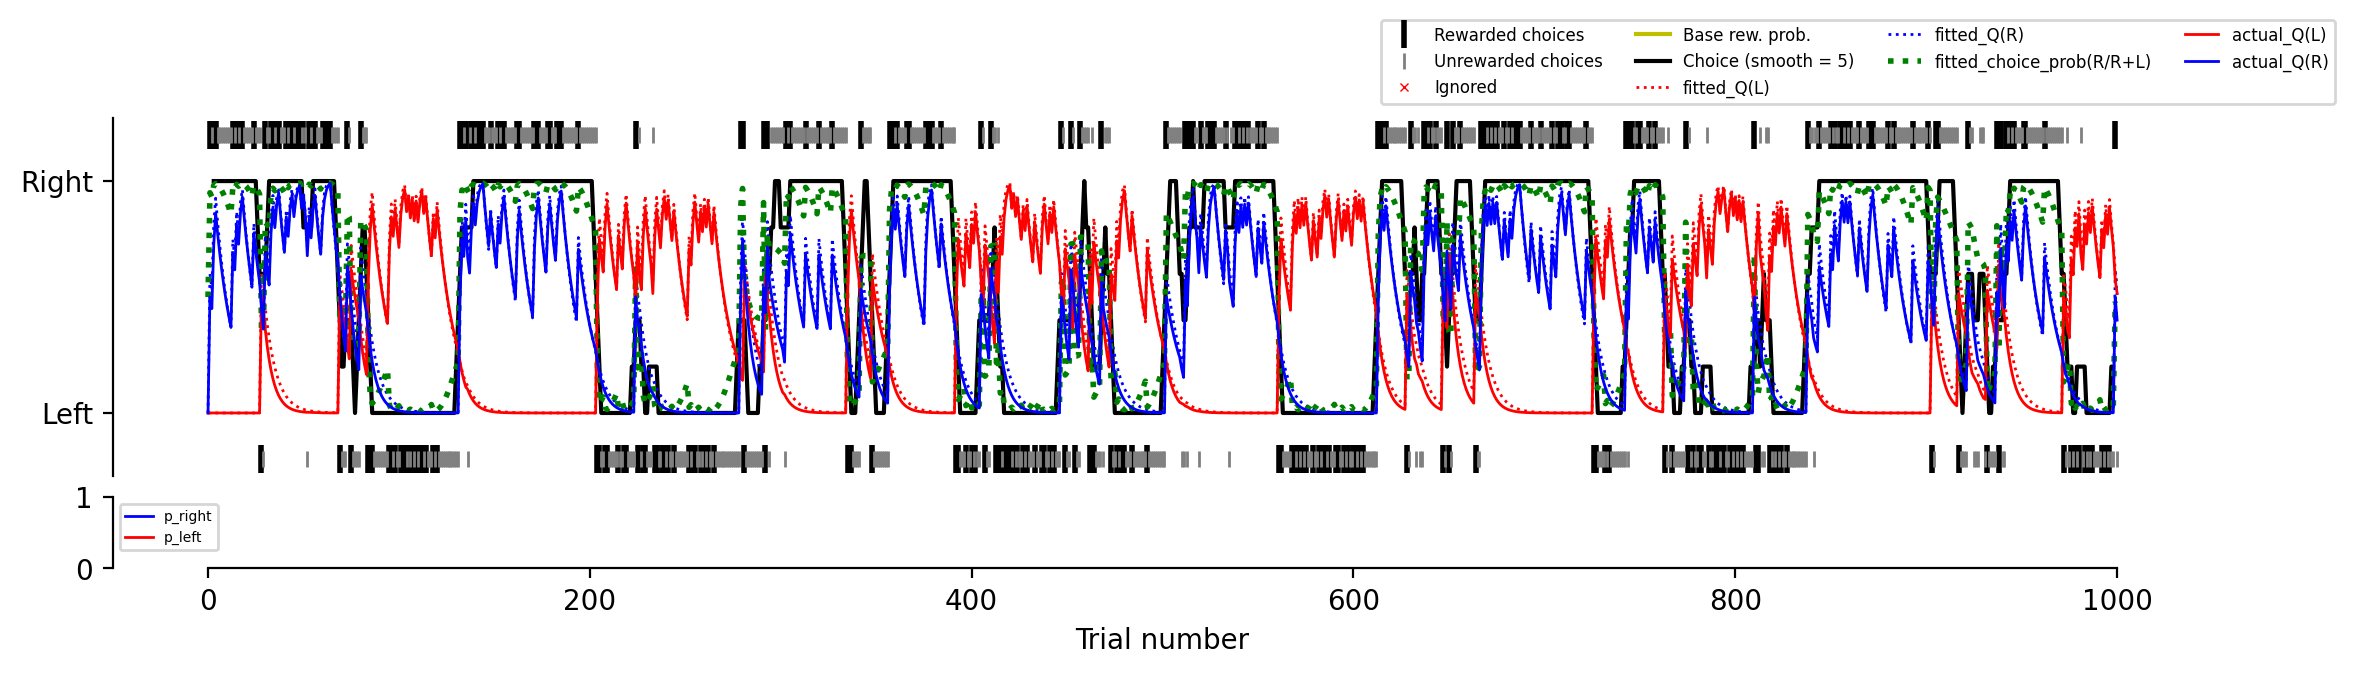

In [6]:
_, forager = time_fitting(16)

fig_fitting, axes = forager.plot_fitted_session(if_plot_latent=True)
axes[0].plot(ground_truth_q_value[0], lw=1, color="red", ls="-", label="actual_Q(L)")
axes[0].plot(ground_truth_q_value[1], lw=1, color="blue", ls="-", label="actual_Q(R)")
axes[0].legend(fontsize=6, loc="upper left", bbox_to_anchor=(0.6, 1.3), ncol=4)